Melakukan Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Semua Library Diatas Termuat")

Semua Library Diatas Termuat


Loading DataSet

In [2]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,CO,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,CO,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,CO,Good
3,1/4/2020,40,8,2,84,29.0,0,84,CO,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...,...
1091,12/27/2022,50,19,16,12,NaN,4,19,PM2.5,Moderate
1092,12/28/2022,51,20,16,12,NaN,4,20,PM2.5,Moderate
1093,12/29/2022,52,21,16,13,NaN,4,21,PM2.5,Moderate
1094,12/30/2022,53,22,17,13,NaN,4,22,PM2.5,Moderate


Data Understanding

In [3]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

,Nama Feature,Penjelasan
1,Date,Tanggal pengukuran
2,PM10,Pengukuran Materi Partikulat
3,SO2,Pengukuran Sulfur Dioksida
4,CO,Pengukuran Karbon Monoksida
5,O3,Pengukuran ozon
6,NO2,Pengukuran Natrium DIoksida
7,Max,Nilai pengukuran tertinggi
8,Critical Component,Komponen nilai pengukuran tertinggi
9,Categoy,Kategori pencemaran udara baik atau tidak


Informasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


Statistik Deskriptif

In [5]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,1096.000000,1096.000000,1096.000000,1096.000000,1036.000000,1096.000000,1096.000000
mean,44.193431,18.738139,10.580292,18.820255,20.960425,2.374088,29.235401
std,10.826190,7.290818,8.068708,17.066338,12.467208,2.227808,15.907933
min,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,35.000000,13.000000,1.000000,10.000000,15.000000,0.000000,20.000000
50%,45.000000,17.000000,14.000000,12.000000,20.000000,3.000000,24.000000
75%,53.000000,23.000000,16.000000,21.000000,26.000000,4.000000,31.000000
max,66.000000,60.000000,28.000000,164.000000,81.000000,8.000000,164.000000


Mengecek keseimbangan data

In [6]:
df["Category"].value_counts()

Category
Moderate     639
Good         393
Unhealthy     64
Name: count, dtype: int64

Data Cleansing dan Data Preprocesing

Mengecek nilai yang hilang

In [7]:
df.isnull().sum()

Date                   0
PM2.5                  0
PM10                   0
SO2                    0
CO                     0
O3                    60
NO2                    0
Max                    0
Critical Component     0
Category               0
dtype: int64

Mengisi Missing Value dengan Nilai Mean pada O3

In [8]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

In [9]:
df.isnull().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

Mengecek Outlier

In [10]:
df_baru = df[["PM2.5","PM10","SO2","NO2","CO","Category"]]

In [11]:
df_baru

,PM2.5,PM10,SO2,NO2,CO,Category
0,45,30,2,0,69,Moderate
1,44,16,2,0,58,Moderate
2,43,12,2,0,46,Good
3,40,8,2,0,84,Moderate
4,38,8,3,0,50,Good
...,...,...,...,...,...,...
1091,50,19,16,4,12,Moderate
1092,51,20,16,4,12,Moderate
1093,52,21,16,4,13,Moderate
1094,53,22,17,4,13,Moderate


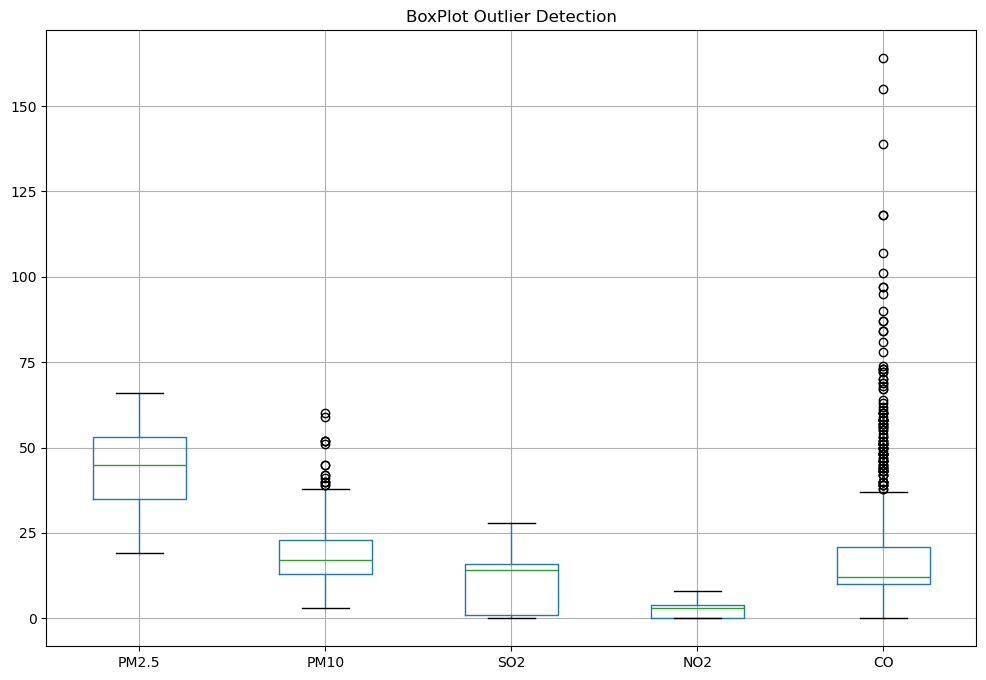

In [12]:
#Membuat boxplot outlier
plt.figure(figsize=(12,8))
plt.title("BoxPlot Outlier Detection")
df_baru.boxplot()
plt.show()

Hilangkan Outlier

In [13]:
def hapus_outlier(data):
    df_bersih = data.copy() #kita melakukan copy data kedalam variabel df_bersih
    for col in df_bersih.columns: #memanggil nama setiap kolom yang disimpan ke dalam variabel col untuk di proses
    #col=pm2.5
        Q1 = data[col].quantile(0.25)#untuk menghitung Q!
        Q3 = data[col].quantile(0.75)#untuk menghitung Q3
        IQR = Q3-Q1 #untuk menghitung IQR range antara Q3 dan Q1
        upper_bound = Q3 + 1.5 * IQR #menghapus outlier bagian atas
        lower_bound = Q1 - 1.5 * IQR#menghitung outlier bagian bawah
        df_bersih = df_bersih[(df_bersih[col]> lower_bound) &(df_bersih[col]<upper_bound)]
    return df_bersih

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Label Encoding
df_baru["Category"]=label_encoder.fit_transform(df_baru["Category"])

In [15]:
df_baru["Category"].value_counts()

Category
1    639
0    393
2     64
Name: count, dtype: int64

1--> moderate

2--> good

3--> unhealty

In [16]:
df_no_outlier = hapus_outlier(df_baru)

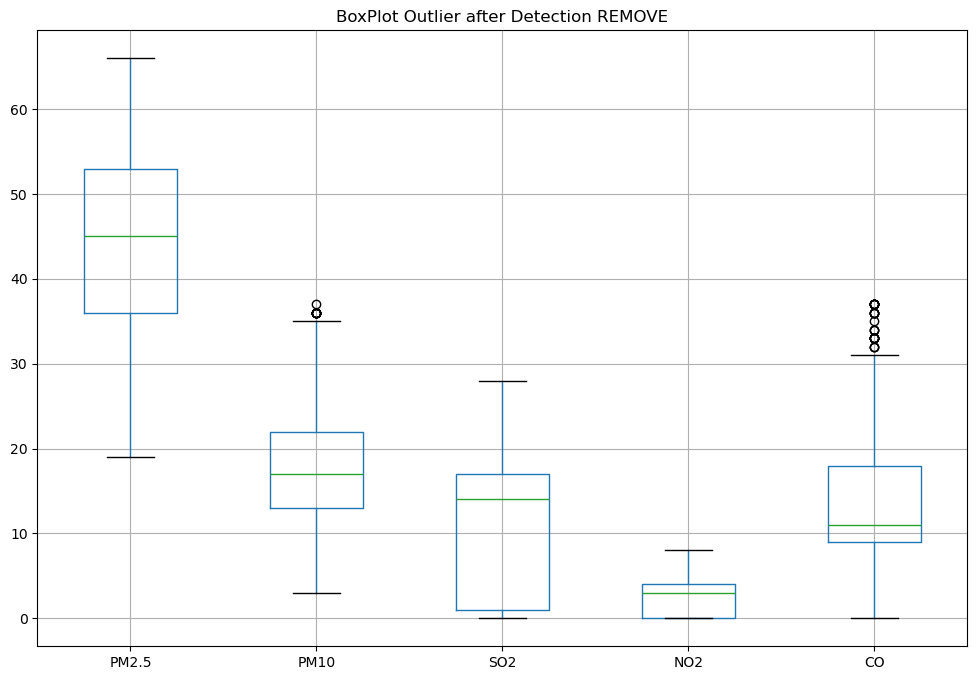

In [17]:
#Membuat boxplot outlier
plt.figure(figsize=(12,8))
df_no_outlier[["PM2.5","PM10","SO2","NO2","CO"]].boxplot()
plt.title("BoxPlot Outlier after Detection REMOVE")
plt.show()

In [18]:
df_no_outlier.shape

(980, 6)

In [19]:
print(df_baru.shape)
print(df_no_outlier.shape)

(1096, 6)
(980, 6)


Pembagian Data Latih dan Uji

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_no_outlier.drop(["Category"], axis=1)
y = df_no_outlier["Category"]

In [22]:
X

,PM2.5,PM10,SO2,NO2,CO
12,31,11,2,0,29
19,34,14,2,0,34
25,31,19,2,0,32
30,26,17,1,0,33
31,25,29,2,0,37
...,...,...,...,...,...
1091,50,19,16,4,12
1092,51,20,16,4,12
1093,52,21,16,4,13
1094,53,22,17,4,13


In [23]:
y

12      0
19      0
25      0
30      0
31      0
       ..
1091    1
1092    1
1093    1
1094    1
1095    1
Name: Category, Length: 980, dtype: int32

Machine Learning (pelatihan dan pengujian 3 rasio)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, classification_report

In [25]:
rasio = [0.2,0.3,0.4]

In [26]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
#algoritma RandomForest, XGBOOST, ADABOOST, Naive Bayes

model = [model_gbc,model_knn]

In [27]:
for i in rasio:
    
    #setting rasio loop
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_gbc
    
    #melatih model
    model.fit(X_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(X_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(X_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model GBC adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model GBC rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model GBC adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model GBC rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model GBC adalah  92.09183673469387
Hasil Klasifikasin Report dari model GBC rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       292
           1       0.94      0.93      0.93       466
           2       0.93      0.96      0.94        26

    accuracy                           0.92       784
   macro avg       0.92      0.93      0.93       784
weighted avg       0.92      0.92      0.92       784

Hasil akurasi pengujian model GBC adalah  79.59183673469387
Hasil Klasifikasin Report dari model GBC rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        70
           1       0.85      0.84      0.84       118
           2       0.50      0.38      0.43         8

    accuracy                           0.80       196
   macro avg       0.70      0.66      0.68       196
weighted avg  